#### Import Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

#### Read the Data and Check Basics

In [2]:
bank_Data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
bank_Data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank_Data.shape

(5000, 14)

In [6]:
#check data types
bank_Data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

###### Removing ID as this is clearly unnecessary column in our data

In [7]:
bank_Data.drop('ID',axis=1,inplace=True)

#### CHeck for missing values

In [8]:
bank_Data.isna().values.any()

False

##### 2.Study the data distribution in each attribute, share your findings

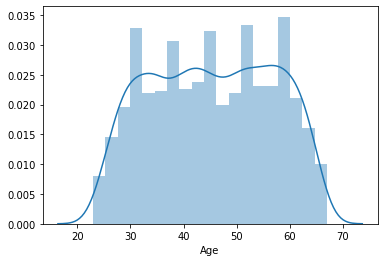

In [9]:
sns.distplot(bank_Data['Age'])

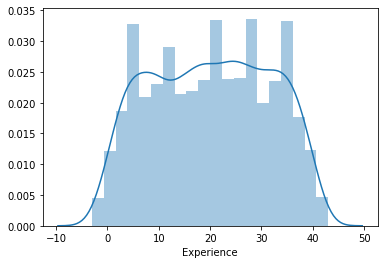

In [10]:
sns.distplot(bank_Data['Experience'])

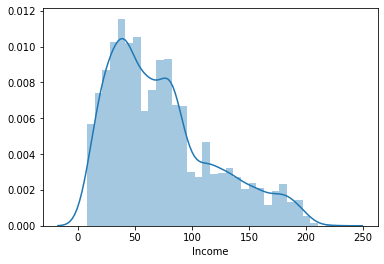

In [11]:
sns.distplot(bank_Data['Income'])

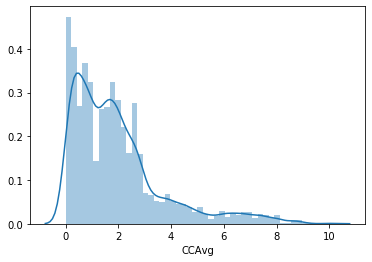

In [12]:
sns.distplot(bank_Data['CCAvg'])

In [13]:
#It Looks like below attributes are more continious variable
#Age
#Experience
#Income
#CCAvg

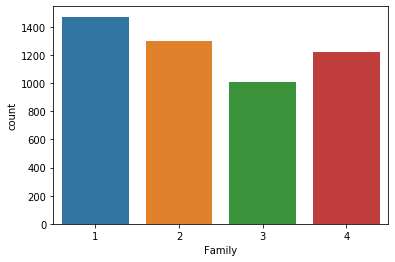

In [14]:
#Distribution of Family
sns.countplot(bank_Data['Family'])

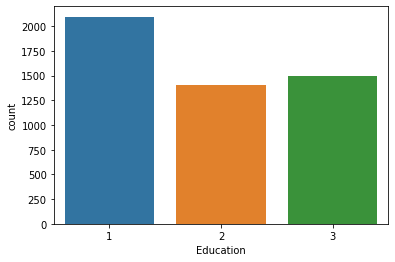

In [15]:
#Distribution of Education
sns.countplot(bank_Data['Education'])

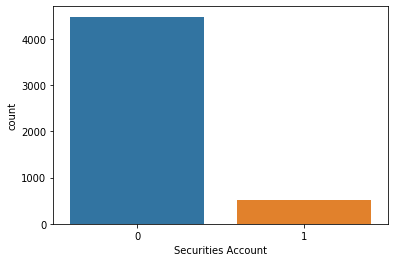

In [20]:
#Distribution of Securities Account
sns.countplot(bank_Data['Securities Account'])

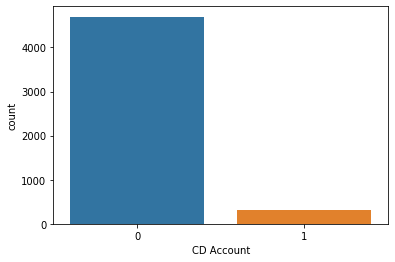

In [21]:
#Distribution of CD Account
sns.countplot(bank_Data['CD Account'])

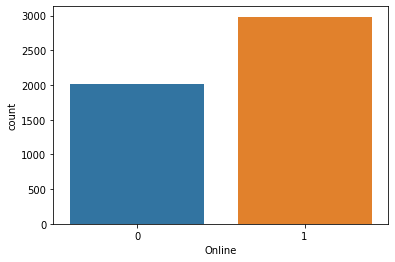

In [22]:
#Distribution of Online
sns.countplot(bank_Data['Online'])

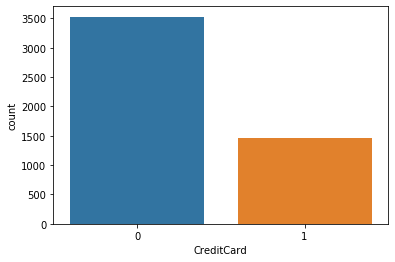

In [23]:
#Distribution of CreditCard
sns.countplot(bank_Data['CreditCard'])

In [24]:
#Below are more like catagorical attributes
#Family
#Education
#Securities Account
#CD account
#Online
#Credit card

#### Check relation between attributes

In [27]:
bank_Data.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


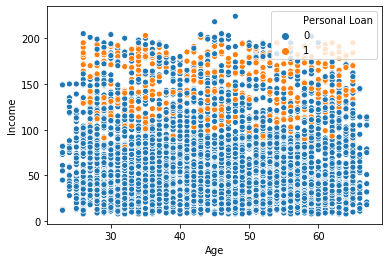

In [29]:
#check from plot if there is any kind of relation between Income and personal loan
sns.scatterplot(bank_Data['Age'],bank_Data['Income'],hue=bank_Data['Personal Loan'])
#Yes We can see for customers having less income definetely not taking personal load

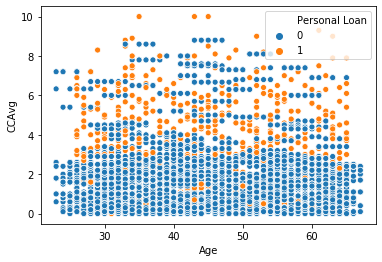

In [30]:
#check from plot if there is any kind of relation between CCAvg and personal loan
sns.scatterplot(bank_Data['Age'],bank_Data['CCAvg'],hue=bank_Data['Personal Loan'])
#yes

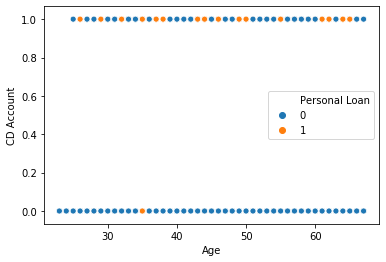

In [23]:
#check from plot if there is any kind of relation between CD Account and personal loan
sns.scatterplot(bank_Data['Age'],bank_Data['CD Account'],hue=bank_Data['Personal Loan'])
#Yes from plot we can say most of the custoer who does not have CD account they do not take personal loan

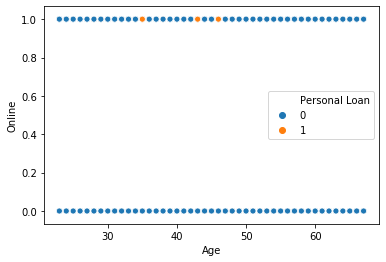

In [31]:
#check from plot if there is any kind of relation between CD Account and personal loan
sns.scatterplot(bank_Data['Age'],bank_Data['Online'],hue=bank_Data['Personal Loan'])
#By seeing plot We can say thatthere is as such no relation between attribute online and persoanl loan but we can see if customer do not have online feature they definetely do not take personal loan


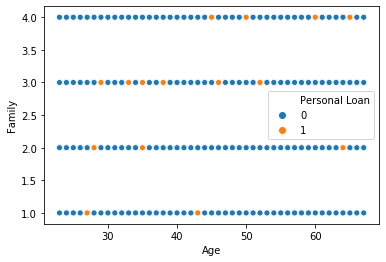

In [32]:
#check the corr between Online and personal loan
sns.scatterplot(bank_Data['Age'],bank_Data['Family'],hue=bank_Data['Personal Loan'])
#no..we cant say if family is this personal loan is taken

In [36]:
#2.Share your findings
# 1.Columns which are number and comtinous : Income,CCAvg
# 2.Corr between aage and exp is very high so impact of one variable will be same of other
# 3.ZIP code is unnecessary column so can be removed
# 4.Family,Education are class variable while Securities Account,CD Account,Online,Credit Card are binary variable

 ##### ZIP Code column can be removed as this column does not giving any significant information

In [16]:
#updating data and removing unwanted column
modified_bank_Data = bank_Data.drop('ZIP Code',axis=1)

In [17]:
#removing Exp as Age is there and both are same
modified_bank_Data.drop('Experience',axis=1,inplace=True)

##### 3.Get the target column distribution.Your comments (5 marks)

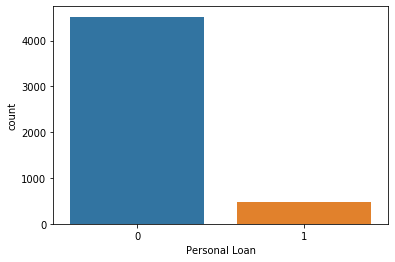

In [18]:
sns.countplot(modified_bank_Data['Personal Loan'])

In [19]:
modified_bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [20]:
#3. using number check target column distribution
personal_loan_taken = modified_bank_Data['Personal Loan']\
.value_counts()
personal_loan_taken

0    4520
1     480
Name: Personal Loan, dtype: int64

In [21]:
#your comments
print(' % of customers accepted the personal loan offered in the last campaign : {}'
      .format(
    personal_loan_taken[0]  * 100 /
    modified_bank_Data.shape[0]))

 % of customers accepted the personal loan offered in the last campaign : 90.4


#### 4.Split the data into training and test set in the ratio of 70:30 respectively

In [22]:

X = modified_bank_Data.drop('Personal Loan',axis=1)
Y = modified_bank_Data['Personal Loan']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, random_state=1)

In [24]:
#Check Split Data
print(y_train.count())
print(x_train.count()[0])
print(y_test.count())
print(x_test.count()[0])

3500
3500
1500
1500


##### Logistic model to fit


In [25]:
# Fit the model on training Data
lg_model = LogisticRegression(solver="liblinear")
lg_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lg_accuracy = lg_model.score(x_test, y_test)
print(lg_accuracy)

0.9426666666666667


In [27]:
lg_y_predict = lg_model.predict(x_test)

#### Using KNN  Model

In [33]:
# for (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)

# get accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_accuracy

0.9093333333333333

In [34]:
# knn.score(y_test, knn_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_accuracy

0.9093333333333333

In [35]:
knn_score=knn.score(x_test, y_test)
knn_score

0.9093333333333333

In [52]:
# Check for (k = 5)
knn = KNeighborsClassifier(n_neighbors = 5)

# fitting the model
knn.fit(x_train, y_train)
knn_y_pred = knn.predict(x_test)
knn.score(y_test, knn_y_pred)
# get  accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_accuracy

0.906

In [53]:
'''get predict for optimal value of k'''
def get_y_predict_optimal_K(n):
    nlist = list(range(1,n))
    oddN = list(filter(lambda x: x % 2 != 0, nlist))
    ac_scores = []
    y_preds = []
    
    for k in oddN:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        scores = accuracy_score(y_test, y_pred)
        ac_scores.append(scores)
        y_preds.append(y_pred)
    #Mininmu MSE
    MSE = [1 - x for x in ac_scores]
    optimal_k = oddN[MSE.index(min(MSE))]
    optimal_y_predict = y_preds[MSE.index(min(MSE))]
    print('Optimal k value for given number is :{} ' .format(optimal_k))
    return optimal_y_predict


In [54]:
#Get Optiomal y oredict for optiomal K
optimal_knn_y_predict = get_y_predict_optimal_K(20)

Optimal k value for given number is :3 


In [55]:
#Get accuracy for optimal Y predict
optimal_knn_score = accuracy_score(y_test, optimal_knn_y_predict)
optimal_knn_score

0.9093333333333333

#### Using naive bayes

In [56]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [57]:
#performance on training data
NB_Predict_train = NB_model.predict(x_train)

NB_train_accuracy = metrics.accuracy_score(y_train,NB_Predict_train)
NB_train_accuracy

0.8894285714285715

In [59]:
#performance on test data
NB_Predict_test = NB_model.predict(x_test)

NB_test_accuracy = metrics.accuracy_score(y_test,NB_Predict_test)
NB_test_accuracy

0.8746666666666667

### Print the confusion matrix for all the above models

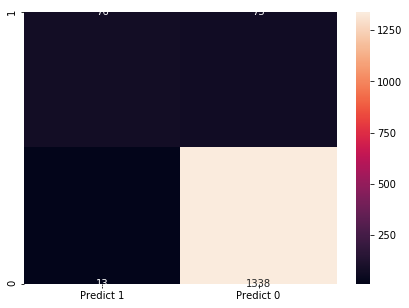

In [86]:
#CM for LG model
cm=metrics.confusion_matrix(y_test, lg_y_predict, labels=[1, 0])

lg_df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(lg_df_cm,annot=True,fmt='d')

In [87]:
print(lg_df_cm)

   Predict 1  Predict 0
1         76         73
0         13       1338


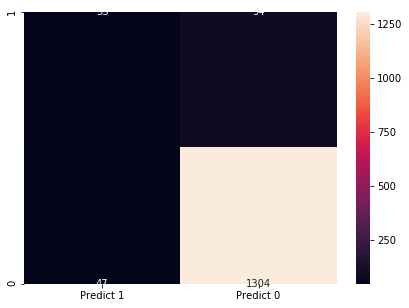

In [93]:
#KNN confusion matrice
cm=metrics.confusion_matrix(y_test, knn_y_pred, labels=[1, 0])

knn_df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_df_cm, annot=True,fmt='d')

In [101]:
print(knn_df_cm)

   Predict 1  Predict 0
1         55         94
0         47       1304


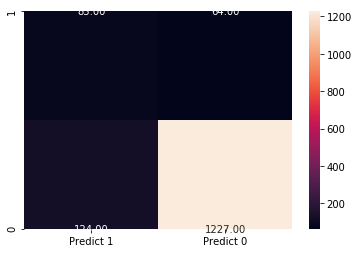

In [94]:
#NB confusion matrice
cm=metrics.confusion_matrix(y_test, NB_Predict_test, labels=[1, 0])

nb_df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
# plt.figure(figsize = (7,7))
sns.heatmap(nb_df_cm, annot=True,fmt='.2f')

In [95]:
print(nb_df_cm)

   Predict 1  Predict 0
1         85         64
0        124       1227


#### Accuracy of Models

In [96]:
print('Accracy of Logistic Model is {}'.format(lg_accuracy))
print('Accracy of OPtimal KNN Model is {}'.format(optimal_knn_score))
print('Accracy of NB Model is {}'.format(NB_test_accuracy))

Accracy of Logistic Model is 0.9426666666666667
Accracy of OPtimal KNN Model is 0.9093333333333333
Accracy of NB Model is 0.8746666666666667


#### Classification Report for Logistic Model

In [97]:
#Check presion,recall paarmeters for model comparision

print(classification_report(y_test, lg_y_predict,labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.85      0.51      0.64       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.94      1500
   macro avg       0.90      0.75      0.80      1500
weighted avg       0.94      0.94      0.94      1500



#### Classification Report for KNN bayes

In [98]:
print(classification_report(y_test, optimal_knn_y_predict,labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.56      0.40      0.47       149
           0       0.94      0.97      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.75      0.68      0.71      1500
weighted avg       0.90      0.91      0.90      1500



#### Classification Report for Naive bayes

In [99]:
print("Classification Report")
print(classification_report(y_test, NB_Predict_test,labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.41      0.57      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



### Comparision of Model

##### Give your reasoning on which is the best model in this case and why it performs better?

##### LOGISTIC REGRESSION is the BEST PERFORMING MODEL for this scenario for the following reasons:
##### Reasoning:
##### 1.Logistic Model giving BETTER CCURACY compring to other models
##### 2.Logistic model have more f1-score than other models which means having best combination of Precision and Recall
#### 3.Naive bayes model giving more True positives compare to logistic momdel but have very less precision
####   which means naive bayes model also giving more False positives (124) which is not in case of Logistic model (13)
#### 4.Naive bayes Model will cause more spending of bank in marketing campaign as bank will be spending more money in for False positive prediction given by naive bayes model